In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
crypto_data_to_load = "Resources/crypto_data.csv"

In [3]:
crypto_data = pd.read_csv(crypto_data_to_load)
crypto_data.head(9)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [4]:
# Removing rows that aren't being traded
df = crypto_data[crypto_data["IsTrading"] == True].drop(columns = "IsTrading")

# Dropping null values
df = df.dropna()

# Converting 'totalcoinsupply' column from string to float
df["TotalCoinSupply"] = df["TotalCoinSupply"].astype(float)

# Keeping only coins that were mined >0, removing all else
df = df[df["TotalCoinsMined"] > 0]

# Removing coin name and unnamed columns. Not necessary 
coins_df = df["CoinName"]
df = df.drop(columns = ["Unnamed: 0", "CoinName"])

In [5]:
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [6]:
# Converting 'algorithm' and 'prooftype' columns into numerical data 
dummies = pd.get_dummies(df)
dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Scaling data by using standard and minmax scalers
crypto_scaled_m = MinMaxScaler().fit_transform(dummies)
crypto_scaled_s = StandardScaler().fit_transform(dummies)

In [8]:
# Reducing dimensions using PCA
pca_m = PCA(n_components = 0.9).fit_transform(crypto_scaled_m)
pca_s = PCA(n_components = 0.9).fit_transform(crypto_scaled_s)


df_pca_m = pd.DataFrame(pca_m)
df_pca_m.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.818637,-0.679241,-0.029655,-0.026442,0.003961,-0.021317,0.036198,-0.036825,-0.008006,0.015627,...,-0.008140,4.366295e-07,5.386012e-17,1.119927e-16,-0.001960,-0.006324,-0.020447,0.009576,-0.005601,-0.001513
1,0.818633,-0.679242,-0.029654,-0.026450,0.003934,-0.021243,0.036267,-0.036775,-0.008027,0.015620,...,-0.007403,-2.752993e-07,5.133210e-17,7.861555e-17,-0.001764,-0.006128,-0.020635,0.009592,-0.005627,-0.001420
2,0.756313,0.226039,-0.357200,-0.305925,-0.409858,-0.196677,-0.363641,0.700611,-0.250646,-0.054169,...,0.174234,8.881527e-05,-1.437464e-15,4.332819e-16,0.047517,0.040196,-0.044609,0.003901,0.000682,0.024190
3,-0.706987,0.247124,-0.272629,-0.607865,0.634856,-0.011515,-0.018222,0.021506,-0.026898,-0.026525,...,-0.004238,2.117135e-06,-1.495515e-16,8.508911e-17,0.000396,-0.002214,0.019534,-0.000514,0.007319,-0.000053
4,-0.701023,0.138647,-0.207299,-0.102160,-0.229490,-0.009397,-0.166562,-0.098807,0.045642,-0.127762,...,-0.001528,-8.191028e-07,1.341162e-16,8.252556e-17,0.000210,-0.003520,-0.009804,-0.011354,0.015906,0.000248


In [9]:
# PCA results with a higher amount of factors from using Standard Scaler
df_pca_s = pd.DataFrame(pca_s)
df_pca_s.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.283066e-14,-1.997025e-14,7.900266e-12,-0.007129,-1.319756,-0.051813,...,-2.368958e-15,-1.445089e-15,-4.418027e-15,3.772304e-15,-3.592104e-15,-8.706285e-15,-3.133180e-15,9.597393e-16,1.975755e-15,-3.716052e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.295626e-14,-2.003594e-14,7.835457e-12,-0.007739,-1.322514,-0.056674,...,-1.116486e-15,-1.711730e-15,-4.312173e-15,3.969410e-15,-3.877941e-15,-8.881044e-15,-3.547644e-15,5.430613e-16,1.997793e-15,-3.116270e-15
2,2.305468,1.656383,-0.683617,0.004731,-3.256411e-14,-2.971927e-14,2.680680e-11,-0.054781,-1.542879,-0.943951,...,1.027446e-13,-9.066971e-15,-2.310298e-15,-8.799507e-14,9.239465e-15,1.920804e-13,6.046412e-14,3.544768e-16,-4.325937e-14,1.657590e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.310566e-15,6.192184e-15,-6.960586e-12,-0.002071,0.281463,0.251862,...,1.471950e-14,4.186262e-15,1.070382e-14,-1.352777e-14,1.961868e-15,3.440548e-14,4.677419e-15,-6.029707e-15,-1.208979e-14,2.350641e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.602225e-14,1.220564e-14,-9.659323e-12,0.027735,0.519099,0.188820,...,1.358106e-13,1.023453e-13,1.566598e-13,-2.339324e-14,-8.663380e-14,-4.885863e-14,-2.649536e-14,-4.654394e-14,-2.088812e-13,-9.403305e-14


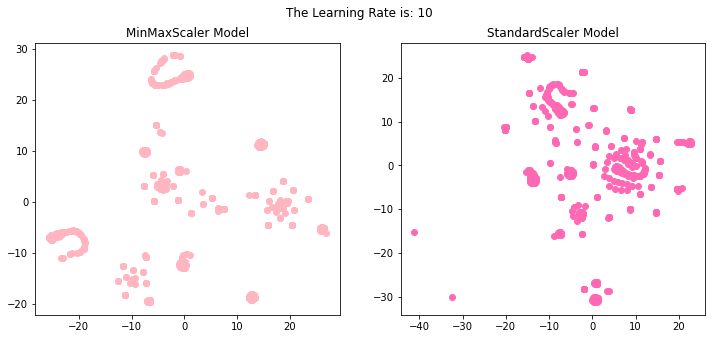

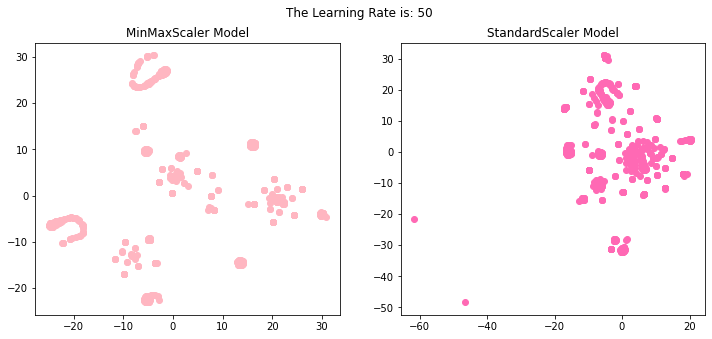

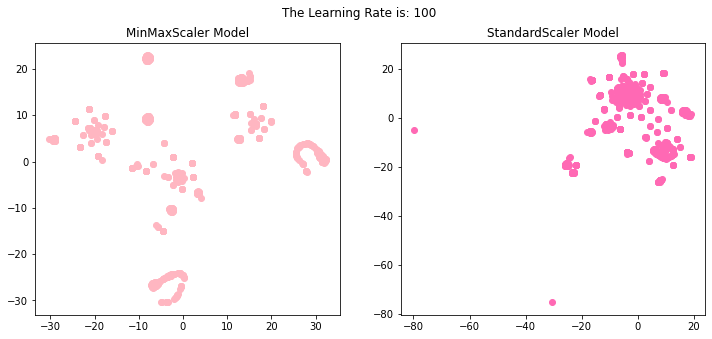

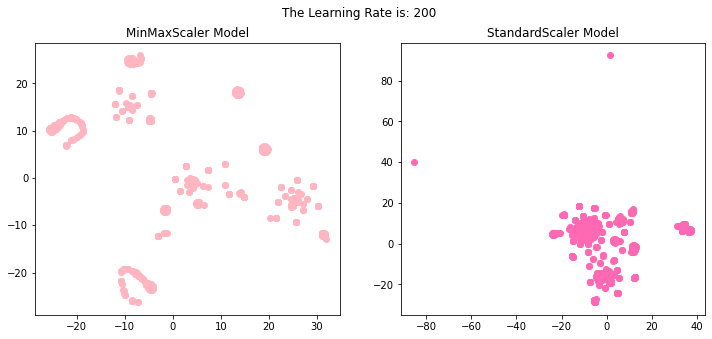

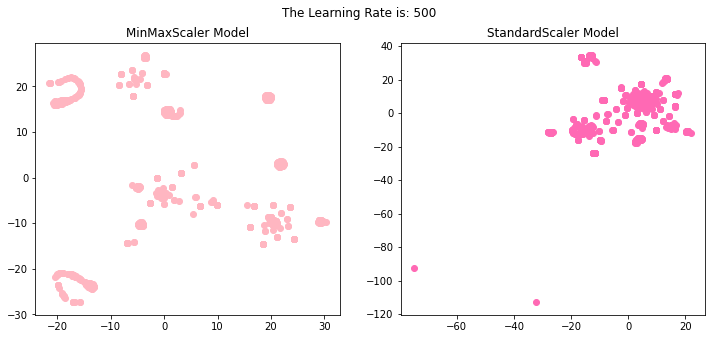

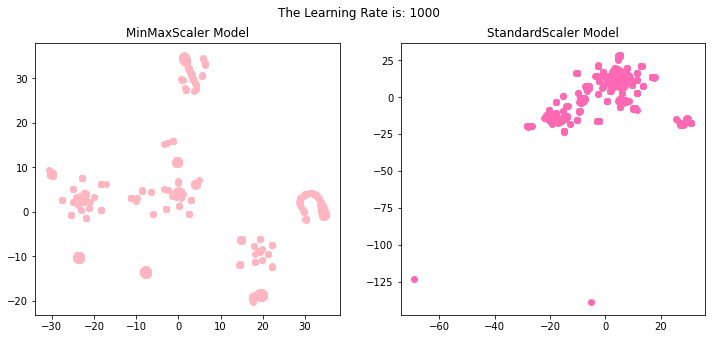

In [10]:
# Creating TSNE learning rate graphs
lr = [10, 50, 100, 200, 500, 1000]

for z in lr:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
    fig.suptitle(f"The Learning Rate is: {z}")
    
    tsne_m = TSNE(learning_rate = z, random_state = 1).fit_transform(df_pca_m)
    ax1.scatter(tsne_m[:,0], tsne_m[:,1], c = "lightpink")
    ax1.set_title("MinMaxScaler Model")
    
    tsne_s = TSNE(learning_rate = z, random_state = 1).fit_transform(df_pca_s)
    ax2.scatter(tsne_s[:,0], tsne_s[:,1], c = "hotpink")
    ax2.set_title("StandardScaler Model")
    
    plt.show()

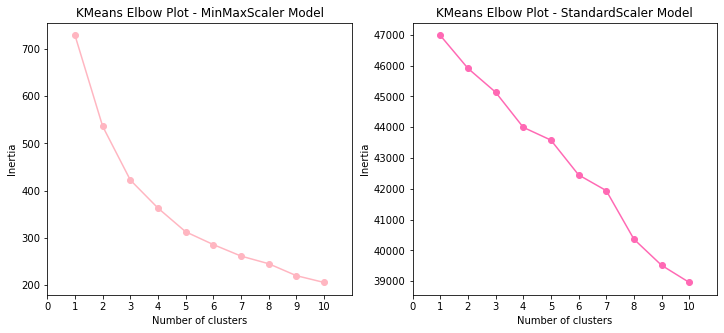

In [11]:
# Finding the best model fit number of clusters using KMeans
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_pca_m)
    inertia.append(km.inertia_)

elbow_data_m = {"k": k, "inertia": inertia}
df_elbow_m = pd.DataFrame(elbow_data_m)

inertia = []
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_pca_s)
    inertia.append(km.inertia_)

elbow_data_s = {"k": k, "inertia": inertia}
df_elbow_s = pd.DataFrame(elbow_data_s)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
ax1.plot(df_elbow_m['k'], df_elbow_m['inertia'], "o-", c = "lightpink")
ax1.set_title("KMeans Elbow Plot - MinMaxScaler Model")

ax2.plot(df_elbow_s['k'], df_elbow_s['inertia'], "o-", c = "hotpink")
ax2.set_title("KMeans Elbow Plot - StandardScaler Model")

for p in [ax1, ax2]:
    p.set_xticks(range(len(k) + 1))
    p.set_xlabel('Number of clusters')
    p.set_xlim(0, len(k) + 1)
    p.set_ylabel('Inertia')
    
plt.show()

In [12]:
tsne_m = TSNE(learning_rate = 300, random_state = 1).fit_transform(df_pca_m)
tsne_s = TSNE(learning_rate = 300, random_state = 1).fit_transform(df_pca_s)

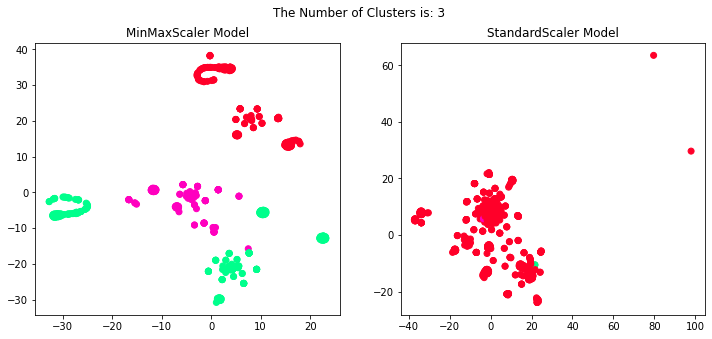

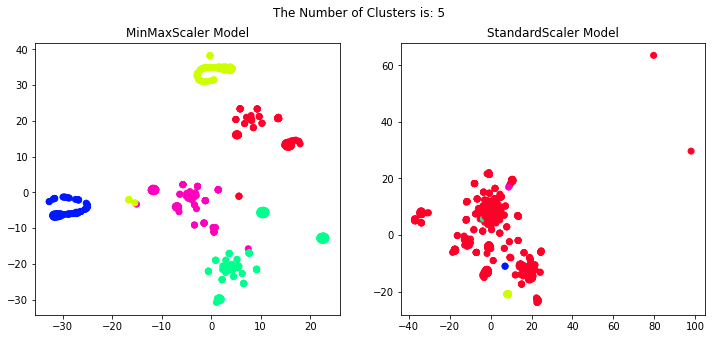

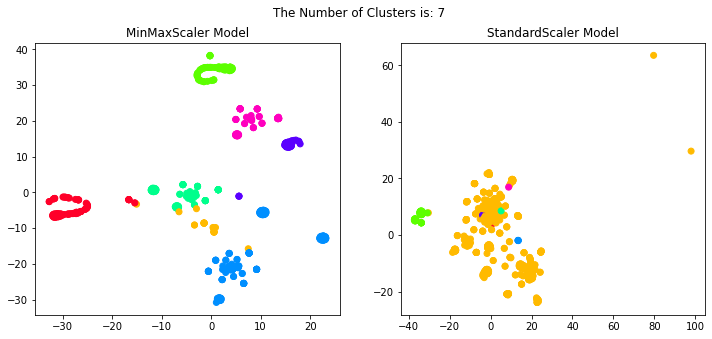

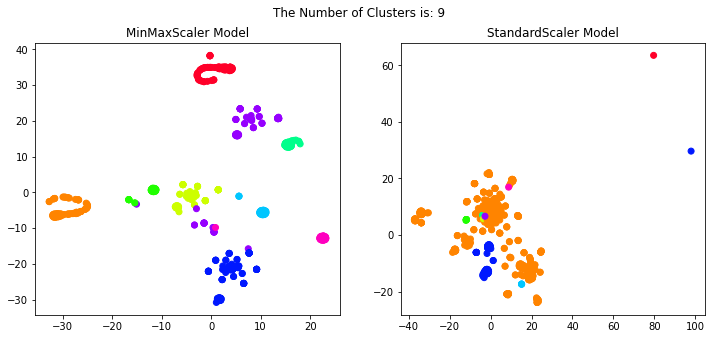

In [13]:
cl = [3, 5, 7, 9]
for c in cl:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
    fig.suptitle(f"The Number of Clusters is: {c}")
    
    predict_m = pd.DataFrame(KMeans(n_clusters=c, random_state=1).fit(df_pca_m).predict(df_pca_m))
    ax1.scatter(tsne_m[:,0], tsne_m[:,1], c = predict_m, cmap = "gist_rainbow")
    ax1.set_title("MinMaxScaler Model")
    
    predict_s = pd.DataFrame(KMeans(n_clusters=c, random_state=1).fit(df_pca_s).predict(df_pca_s))
    ax2.scatter(tsne_s[:,0], tsne_s[:,1], c = predict_s, cmap = "gist_rainbow")
    ax2.set_title("StandardScaler Model")
    
    plt.show()